In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import os

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import ResNet50

# CNN MODEL FOR MNIST DATASET
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# mnist_model = define_model()
# mnist_model.load_weights('mnist_cnn_weights.weights.h5')



In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Preprocessing function with ImageNet dimensions
def preprocess(image, label):
    # Resize to ImageNet's original dimension: 224x224
    image = tf.image.resize(image, (32, 32))
    # Normalize pixel values to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Load the Imagenette dataset and limit to the first 100 examples
dataset_name = "imagenette"  # Smaller subset of ImageNet
dataset, info = tfds.load(
    dataset_name,
    split="validation",
    as_supervised=True,
    with_info=True
)

# Take the first 100 samples for testing
subset_dataset = dataset.take(100)

# Apply preprocessing and batching
test_dataset = subset_dataset.map(preprocess).batch(1).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load a pretrained model: EfficientNetV2B0
imagenet_model = tf.keras.applications.EfficientNetV2B0(
    weights="imagenet",
    input_shape=(32, 32, 3),
    include_top=False,
    pooling="avg"
)

# Add a classification head for Imagenette's 10 classes
imagenette_classes = info.features['label'].num_classes
classifier = tf.keras.layers.Dense(imagenette_classes, activation="softmax")
imagenet_model = tf.keras.Sequential([imagenet_model, classifier])

# Compile the model for evaluation
imagenet_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Evaluate on the limited dataset
results = imagenet_model.evaluate(test_dataset, verbose=1)
loss, accuracy = results[0], results[1]

print(f'Test accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss:.4f}')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/9469 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenette/full-size-v2/incomplete.6VFEEX_1.0.0/imagenette-train.tfrecord*…

Generating validation examples...:   0%|          | 0/3925 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenette/full-size-v2/incomplete.6VFEEX_1.0.0/imagenette-validation.tfre…

Dataset imagenette downloaded and prepared to /root/tensorflow_datasets/imagenette/full-size-v2/1.0.0. Subsequent calls will reuse this data.
24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1011 - loss: 2.3276
Test accuracy: 8.00%
Test loss: 2.3518


In [4]:
# Preprocessing function with immediate resizing
def preprocess(image, label):
    # image = tf.image.rgb_to_grayscale(image)
    # # Duplicate grayscale channel to create 3 identical channels
    # image = tf.image.grayscale_to_rgb(image)
    # Resize to ensure all images are 224x224
    image = tf.image.resize(image, (32, 32))
    # Normalize pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing immediately to the dataset
prepared_dataset = subset_dataset.map(preprocess)

# Convert preprocessed dataset to NumPy arrays
testX = []
testY = []

for image, label in prepared_dataset:
    testX.append(image.numpy())
    testY.append(label.numpy())

testX = np.array(testX)
testY = np.array(testY)

print("testX shape:", testX.shape)  # Should be (100, 224, 224, 3)
print("testY shape:", testY.shape)  # Should be (100,)
for i in range(len(testX)):
  print(i, "th image: ", testX[i].shape)


testX shape: (100, 32, 32, 3)
testY shape: (100,)
0 th image:  (32, 32, 3)
1 th image:  (32, 32, 3)
2 th image:  (32, 32, 3)
3 th image:  (32, 32, 3)
4 th image:  (32, 32, 3)
5 th image:  (32, 32, 3)
6 th image:  (32, 32, 3)
7 th image:  (32, 32, 3)
8 th image:  (32, 32, 3)
9 th image:  (32, 32, 3)
10 th image:  (32, 32, 3)
11 th image:  (32, 32, 3)
12 th image:  (32, 32, 3)
13 th image:  (32, 32, 3)
14 th image:  (32, 32, 3)
15 th image:  (32, 32, 3)
16 th image:  (32, 32, 3)
17 th image:  (32, 32, 3)
18 th image:  (32, 32, 3)
19 th image:  (32, 32, 3)
20 th image:  (32, 32, 3)
21 th image:  (32, 32, 3)
22 th image:  (32, 32, 3)
23 th image:  (32, 32, 3)
24 th image:  (32, 32, 3)
25 th image:  (32, 32, 3)
26 th image:  (32, 32, 3)
27 th image:  (32, 32, 3)
28 th image:  (32, 32, 3)
29 th image:  (32, 32, 3)
30 th image:  (32, 32, 3)
31 th image:  (32, 32, 3)
32 th image:  (32, 32, 3)
33 th image:  (32, 32, 3)
34 th image:  (32, 32, 3)
35 th image:  (32, 32, 3)
36 th image:  (32, 32, 3

In [5]:
def get_fx_fxI(f, xs, Is):
  """
  Returns arrays fx and fxI, defined as:
  fx[i]    = f(x),   where x = xs[i]
  fxI[i,j] = f(x-I), where x = xs[i], I = Is[j]
  """
  inputs = []
  for x in xs:
    inputs.append(x)
    for I in Is:
      inputs.append(x-I)
  inputs = np.array(inputs)
  outputs = f(inputs)
  fx = np.ndarray((len(xs),))
  fxI = np.ndarray((len(xs), len(Is)))
  o = 0
  for i in range(len(xs)):
    fx[i] = outputs[o]
    o += 1
    for j in range(len(Is)):
      fxI[i,j] = outputs[o]
      o += 1
  return fx, fxI

In [6]:
import numpy as np
import torch

def explain_metrix(fx, fxI, Is, lam, N, K, tol):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # Ensure Is are flattened numpy arrays
    Is = [I.flatten().reshape(-1, 1) for I in Is]

    int_II = np.array([I @ I.T for I in Is]).mean(axis=0)
    ints_Idf = np.ndarray((N+1, K, 1))
    for i in range(N+1):
      ints_Idf[i] = np.array([I * (fx[i] - fxI[i,j]) for j, I in enumerate(Is)]).mean(axis=0)
    first_mat = np.linalg.inv(lam * N * np.identity(K) + int_II)

    ints_Idf = torch.tensor(ints_Idf, device=device)
    first_mat = torch.tensor(first_mat, device=device)

    phis = torch.zeros(N+1, K, 1, device=device)
    while True:
      phis_prev = phis.clone()
      for n in range(N+1):
        phis_sum = phis.sum(axis=0)
        second_mat = lam * (phis_sum - phis[n]) + ints_Idf[n]
        phis[n] = first_mat @ second_mat
      if torch.abs(phis - phis_prev).max() < tol:
        break

    return np.array(phis.cpu())

In [7]:
import numpy as np
import torch
from scipy.ndimage import gaussian_filter

def explain_yeh(fx, fxI, Is, lam, N, K, sigma=None):
    # Ensure Is are flattened numpy arrays
    Is = [I.flatten().reshape(-1, 1) for I in Is]

    int_II = np.array([I @ I.T for I in Is]).mean(axis=0)
    int_II_inv = np.linalg.inv(int_II)

    phis = np.zeros((N+1, K, 1))
    for i in range(N+1):
      int_Idf = np.array([I * (fx[i] - fxI[i,j]) for j, I in enumerate(Is)]).mean(axis=0)
      phis[i] = int_II_inv @ int_Idf

    # No smoothing
    if sigma is None:
      return phis

    # Apply Gaussian smoothing to the explanations
    smoothed_phis = np.zeros_like(phis)
    for i in range(N+1):
      smoothed_phis[i] = gaussian_filter(phis[i].reshape(28, 28), sigma=sigma).reshape(K, 1)

    return smoothed_phis

In [8]:
def infidelity(fx, fxI, phi, Is):
  a = [(I.T @ phi - (fx - fxI[j]))**2 for j, I in enumerate(Is)]
  return np.array(a).mean()

def sensitivity(phis):
  phi0 = phis[0]
  return max(((phi-phi0)**2).sum() for phi in phis[1:])

In [71]:
N = 100
M = 10
lam = 1
tol = 1e-5

def run_explanations(x, cnn_model):
    np.random.seed(0)
    K = x.shape[0] * x.shape[1] * x.shape[2]  # Total number of pixels

    # Flatten the image for consistent operations
    x_flat = x.flatten()

    xs = [x_flat]
    for _ in range(N):
        xs.append(x_flat + np.random.normal(size=x_flat.shape, scale=0.2))

    Is = []
    for _ in range(M):
        Is.append(x_flat - np.random.normal(size=x_flat.shape, scale=0.01))

    print("run explanations:", x_flat.shape)
    testX_image = np.expand_dims(x, axis=0)

    probs = cnn_model.predict(testX_image).flatten()
    max_class = probs.argmax()

    def fn_mnist(inputs):
        # Reshape inputs back to image shape for prediction
        reshaped_inputs = inputs.reshape(-1, 32, 32, 3)
        probs = cnn_model.predict(reshaped_inputs)
        return probs[:, max_class]

    fx, fxI = get_fx_fxI(fn_mnist, xs, Is)

    return (explain_metrix(fx, fxI, Is, lam, N, K, tol),
            explain_yeh(fx, fxI, Is, lam, N, K),
            xs, Is, fx, fxI)


def run_range(start, end):
  testX_processed = [testX[i] for i in range(start, end)]
  print("testX processed: ", testX_processed[0].shape)

  ours_results = []
  yehs_results = []
  ours_results_infidelity = []
  yehs_results_infidelity = []
  ours_results_sensitivity = []
  yehs_results_sensitivity = []

  for i in range(end-start):
    ours, yehs, cur_xs, cur_Is, fx, fxI = run_explanations(testX_processed[i], imagenet_model)
    ours_results.append(ours)
    yehs_results.append(yehs)

    cur_ours_inf = infidelity(fx[0], fxI[0], ours[0], cur_Is)
    cur_yehs_inf = infidelity(fx[0], fxI[0], yehs[0], cur_Is)
    cur_ours_sens = sensitivity(ours)
    cur_yehs_sens = sensitivity(yehs)

    ours_results_infidelity.append(cur_ours_inf)
    yehs_results_infidelity.append(cur_yehs_inf)
    ours_results_sensitivity.append(cur_ours_sens)
    yehs_results_sensitivity.append(cur_yehs_sens)

    if not os.path.exists('output'):
      os.mkdir('output')
    for j in range(N):
      np.save(f'output/image_{i}_perturb_{j}', cur_xs[j])
      np.save(f'output/ours_{i}_perturb_{j}', ours[j])
      np.save(f'output/yehs_{i}_perturb_{j}', yehs[j])

  return (ours_results_infidelity, yehs_results_infidelity,
          ours_results_sensitivity, yehs_results_sensitivity)

results = run_range(0, 5)
print(results)

testX processed:  (32, 32, 3)
run explanations: (3072,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
run explanations: (3072,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
run explanations: (3072,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
run explanations: (3072,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
run explanations: (3072,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
([4.24076225055539e-09, 5.788524668693697e-09, 3.850578404613159e-09, 6.707026503030382e-08, 6.346696458396495e-10], [0.005347847477713503, 0.12850096981402478, 0.00796713139539548, 0.0009180187772829314, 0.020958606500056664], [8.598519e-11, 2.156452e-10, 1.3948506e-10, 1.341432e-10, 5.4800877e-12], [6750.334731277567, 19211.475746123844, 3749.3536086440345, 320.96093319990905, 758.1674300087325])


In [ ]:
# !zip -r /content/output.zip /content/output

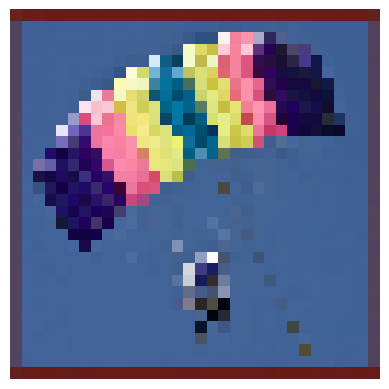

In [64]:
fig, ax = plt.subplots(1)  # This creates a single Axes object
img = np.load(f'output/image_0_perturb_0.npy').reshape(32, 32, 3)  # Load and reshape the image
ax.imshow(img, vmin=0, vmax=1)  # Use the single Axes object directly
ax.set_axis_off()  # Turn off the axes
plt.show()  # Display the plot

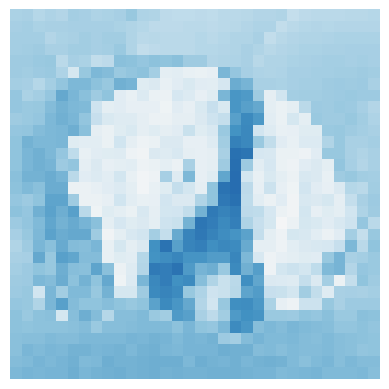

[[[-1.1467566e-06 -1.1147988e-06 -9.1570922e-07]
  [-1.1896728e-06 -1.1495862e-06 -9.2707808e-07]
  [-1.0461083e-06 -9.9220301e-07 -7.8110554e-07]
  ...
  [-9.3746962e-07 -9.6058352e-07 -8.5053370e-07]
  [-9.6959025e-07 -9.7059012e-07 -8.4444997e-07]
  [-9.8754708e-07 -9.7701172e-07 -8.7746213e-07]]

 [[-1.2057827e-06 -1.1675584e-06 -9.5247094e-07]
  [-1.2293591e-06 -1.1750575e-06 -9.7639133e-07]
  [-1.1351120e-06 -1.1016242e-06 -9.2141244e-07]
  ...
  [-1.0007819e-06 -1.0302634e-06 -8.9346611e-07]
  [-1.0151913e-06 -1.0188884e-06 -8.9777967e-07]
  [-9.9184774e-07 -1.0268030e-06 -8.8613325e-07]]

 [[-1.2348276e-06 -1.1695989e-06 -9.6449753e-07]
  [-1.2101368e-06 -1.1789592e-06 -9.8796590e-07]
  [-1.2477886e-06 -1.1900426e-06 -9.7675036e-07]
  ...
  [-1.0974243e-06 -1.0996586e-06 -9.8208295e-07]
  [-1.0934046e-06 -1.1052435e-06 -9.7639020e-07]
  [-1.0880914e-06 -1.0819419e-06 -9.6059159e-07]]

 ...

 [[-1.4068185e-06 -1.4466090e-06 -1.3075985e-06]
  [-1.5470421e-06 -1.5774978e-06 -1.434

In [72]:
fig, ax = plt.subplots(1)  # This creates a single Axes object
img = np.load(f'output/ours_3_perturb_0.npy').reshape(32, 32, 3)  # Load and reshape the image
ax.imshow(img.sum(axis=2), cmap='RdBu_r', vmin=-1e-5, vmax=1e-5)  # Use the single Axes object directly
ax.set_axis_off()  # Turn off the axes
plt.show()  # Display the plot
print(img)

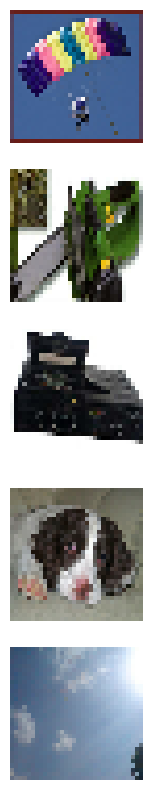

In [66]:
fig, ax = plt.subplots(5, figsize=(5, 10))
for i in range(5):
  img = np.load(f'output/image_{i}_perturb_0.npy').reshape(32, 32, 3)
  ax[i].imshow(img, cmap='gray', vmin=-1, vmax=1)
  ax[i].set_axis_off()

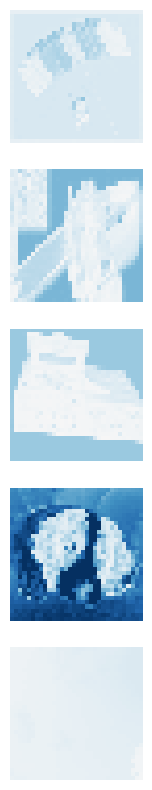

In [73]:
fig, ax = plt.subplots(5, figsize=(5, 10))
for i in range(5):
  img = np.load(f'output/ours_{i}_perturb_0.npy').reshape(32, 32, 3)
  ax[i].imshow(img.sum(axis=2), cmap='RdBu_r', vmin=-5e-6, vmax=5e-6)
  ax[i].set_axis_off()